# Import Libraries

In [39]:
#import the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from numpy import std
from statistics import mean

 


# Columns in Drug data

In [40]:
names = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking', 'Alcohol', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']

# Load Drug Consumption data

In [41]:
data = pd.read_csv(r'E:\uOttawaTerm1\ML\Assign1/drug_consumption.data', header = None, names = names)
data

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,...,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [42]:
data.head()


,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,...,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [43]:
data_columns = data.columns

print(data_columns)

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
       'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness',
       'Conscientiousness', 'Impulsiveness', 'Sensation_seeking', 'Alcohol',
       'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis',
       'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine',
       'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron',
       'VSA'],
      dtype='object')


In [44]:
print(data.isna().sum())

ID                   0
Age                  0
Gender               0
Education            0
Country              0
Ethnicity            0
Neuroticism          0
Extraversion         0
Openness             0
Agreeableness        0
Conscientiousness    0
Impulsiveness        0
Sensation_seeking    0
Alcohol              0
Amphetamine          0
Amyl_nitrite         0
Benzodiazepine       0
Caffeine             0
Cannabis             0
Chocolate            0
Cocaine              0
Crack                0
Ecstasy              0
Heroin               0
Ketamine             0
Legal_highs          0
LSD                  0
Methadone            0
Mushrooms            0
Nicotine             0
Semeron              0
VSA                  0
dtype: int64


In [45]:
data_nunique_dict = data.nunique().to_dict()
data_nunique_dict

{'ID': 1885,
 'Age': 6,
 'Gender': 2,
 'Education': 9,
 'Country': 7,
 'Ethnicity': 7,
 'Neuroticism': 49,
 'Extraversion': 42,
 'Openness': 35,
 'Agreeableness': 41,
 'Conscientiousness': 41,
 'Impulsiveness': 10,
 'Sensation_seeking': 11,
 'Alcohol': 7,
 'Amphetamine': 7,
 'Amyl_nitrite': 7,
 'Benzodiazepine': 7,
 'Caffeine': 7,
 'Cannabis': 7,
 'Chocolate': 7,
 'Cocaine': 7,
 'Crack': 7,
 'Ecstasy': 7,
 'Heroin': 7,
 'Ketamine': 7,
 'Legal_highs': 7,
 'LSD': 7,
 'Methadone': 7,
 'Mushrooms': 7,
 'Nicotine': 7,
 'Semeron': 5,
 'VSA': 7}

In [46]:
data.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [47]:
data

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,...,Ecstasy,Heroin,Ketamine,Legal_highs,LSD,Methadone,Mushrooms,Nicotine,Semeron,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [48]:
data.set_index('ID', inplace = True)

In [49]:
def change(a):
    
    if ((a == 'CL2') or (a == 'CL3') or (a == 'CL6') or (a == 'CL5') or (a == 'CL4')):
        a = 1
    
    elif ((a == 'CL0') or (a == 'CL1') ):
        a = 0
    
    return a

In [50]:
def changeBin(a):
    
    if (a>=2):
        a = 1
    
    elif ((a == '0') or (a == '1') ):
        a = 0
    
    return a

In [51]:
input_data = data.iloc[ :, :12]
input_data

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking
ID,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593


<AxesSubplot:>

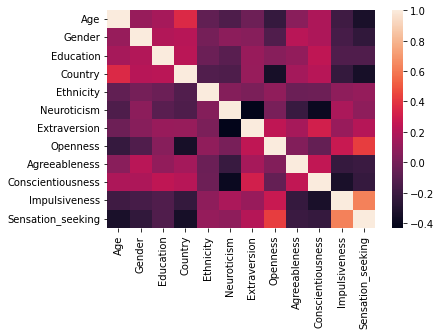

In [52]:
import seaborn as sns
sns.heatmap(data.corr())


# Encoding Labels for Cannabis

In [53]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
input_data['Cannabis']= labelencoder.fit_transform(data['Cannabis'])
input_data


,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking,Cannabis
ID,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,4
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,3
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,2
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,3
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,6


In [54]:
data_nunique_dict = input_data.nunique().to_dict()
data_nunique_dict

{'Age': 6,
 'Gender': 2,
 'Education': 9,
 'Country': 7,
 'Ethnicity': 7,
 'Neuroticism': 49,
 'Extraversion': 42,
 'Openness': 35,
 'Agreeableness': 41,
 'Conscientiousness': 41,
 'Impulsiveness': 10,
 'Sensation_seeking': 11,
 'Cannabis': 7}

In [55]:
training_data= input_data.iloc[ :, :12]
training_data

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking
ID,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593


# Change the problem to binary

In [56]:
input_data['Cannabis'] = input_data['Cannabis'].map(changeBin)
input_data

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking,Cannabis
ID,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1


In [57]:
Cannabis_target_data= input_data['Cannabis']
Cannabis_target_data

ID
1       0
2       1
3       1
4       1
5       1
       ..
1884    1
1885    1
1886    1
1887    1
1888    1
Name: Cannabis, Length: 1885, dtype: int64

# Train-test Split

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(training_data, input_data['Cannabis'], test_size=0.33)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1262, 12) (623, 12) (1262,) (623,)


# Apply Min-Max Scaling

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_x_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)


scaled_x_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)


In [81]:
scaled_x_train

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking
0,0.409137,1.0,0.412820,1.000000,0.262143,0.634029,0.430787,0.372052,0.788004,0.723111,0.215401,0.000000
1,0.000000,0.0,0.412820,0.000000,0.262143,0.600865,0.631894,0.835399,0.379494,0.378274,0.705068,1.000000
2,0.246475,0.0,0.273376,0.186098,0.262143,0.788369,0.218491,0.702175,0.379494,0.267654,0.337920,0.224398
3,0.577496,1.0,1.000000,1.000000,0.262143,0.425185,0.606851,0.624600,0.497262,0.539633,0.337920,0.388117
4,0.409137,1.0,0.653938,0.000000,0.262143,0.713541,0.430787,0.702175,0.329710,0.539633,0.215401,0.308011
...,...,...,...,...,...,...,...,...,...,...,...,...
1257,0.246475,1.0,0.814329,0.510396,0.262143,0.322174,0.934001,0.647268,0.853820,0.516012,0.565343,1.000000
1258,0.246475,0.0,0.653938,1.000000,0.262143,0.634029,0.430787,0.602341,0.403981,0.378274,0.428474,0.465658
1259,0.409137,1.0,0.653938,1.000000,0.262143,0.651260,0.238468,0.478690,0.545581,0.455257,0.337920,0.000000
1260,0.577496,1.0,0.537681,1.000000,0.262143,0.339798,0.430787,0.172170,0.755132,0.286878,0.215401,0.132468


In [82]:
scaled_x_test

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking
0,0.246475,1.0,0.157911,1.000000,0.262143,0.668087,0.529890,0.348943,0.569444,0.415533,0.337920,0.465658
1,0.000000,0.0,0.537681,0.000000,0.405213,0.572739,0.479144,0.647268,0.148686,0.697593,0.629735,1.000000
2,0.000000,1.0,0.814329,1.000000,0.262143,0.527421,0.350233,0.527023,0.593499,0.565147,0.215401,0.224398
3,0.000000,0.0,0.653938,0.308601,0.262143,0.281998,0.350233,0.435690,0.308046,0.286878,0.503573,0.710933
4,0.000000,0.0,0.653938,1.000000,0.262143,0.731297,0.656033,0.702175,0.475475,0.397163,0.809491,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
618,0.409137,0.0,0.653938,1.000000,0.262143,0.304404,0.606851,0.702175,0.403981,0.397163,0.565343,0.710933
619,0.246475,0.0,0.537681,0.000000,0.405213,0.617377,0.631894,0.501355,0.428229,0.591335,0.503573,0.465658
620,0.000000,1.0,0.653938,0.000000,0.262143,0.542842,0.529890,0.527023,0.098033,0.591335,0.629735,0.710933
621,0.246475,1.0,0.537681,1.000000,0.262143,0.361111,0.656033,0.299519,0.545581,0.475814,0.337920,0.308011


# Feature Selection 

In [62]:
from sklearn.feature_selection import chi2
import pandas as pd

In [63]:
chi_scores = chi2(scaled_x_train,Y_train)

In [64]:
chi_scores

(array([20.48493182, 34.38187199,  1.88216368, 55.17112853,  0.15546219,
         0.50597484,  0.07873754,  6.19413632,  1.25179967,  3.29481926,
         4.23046389, 16.66838478]),
 array([6.01025460e-06, 4.52922255e-09, 1.70088435e-01, 1.10479672e-13,
        6.93369203e-01, 4.76886526e-01, 7.79015609e-01, 1.28174259e-02,
        2.63209028e-01, 6.94987564e-02, 3.97045872e-02, 4.45167521e-05]))

In [65]:
p_val = pd.Series(chi_scores[1])
p_val.index = scaled_x_train.columns
p_val

Age                  6.010255e-06
Gender               4.529223e-09
Education            1.700884e-01
Country              1.104797e-13
Ethnicity            6.933692e-01
Neuroticism          4.768865e-01
Extraversion         7.790156e-01
Openness             1.281743e-02
Agreeableness        2.632090e-01
Conscientiousness    6.949876e-02
Impulsiveness        3.970459e-02
Sensation_seeking    4.451675e-05
dtype: float64

In [66]:
p_val=p_val.sort_values(ascending=False)

In [67]:
p_val

Extraversion         7.790156e-01
Ethnicity            6.933692e-01
Neuroticism          4.768865e-01
Agreeableness        2.632090e-01
Education            1.700884e-01
Conscientiousness    6.949876e-02
Impulsiveness        3.970459e-02
Openness             1.281743e-02
Sensation_seeking    4.451675e-05
Age                  6.010255e-06
Gender               4.529223e-09
Country              1.104797e-13
dtype: float64

<AxesSubplot:>

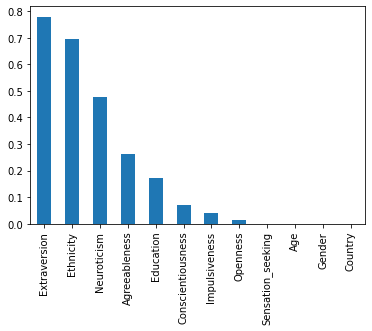

In [68]:
p_val.plot.bar()


# Dataset D 

In [83]:
Cannabis_train_data = scaled_x_train[['Extraversion','Neuroticism','Ethnicity','Agreeableness','Conscientiousness','Education']]

In [84]:
Cannabis_test_data = scaled_x_test[['Extraversion','Neuroticism','Ethnicity','Agreeableness','Conscientiousness','Education' ]]

In [85]:
Cannabis_train_data

,Extraversion,Neuroticism,Ethnicity,Agreeableness,Conscientiousness,Education
0,0.430787,0.634029,0.262143,0.788004,0.723111,0.412820
1,0.631894,0.600865,0.262143,0.379494,0.378274,0.412820
2,0.218491,0.788369,0.262143,0.379494,0.267654,0.273376
3,0.606851,0.425185,0.262143,0.497262,0.539633,1.000000
4,0.430787,0.713541,0.262143,0.329710,0.539633,0.653938
...,...,...,...,...,...,...
1257,0.934001,0.322174,0.262143,0.853820,0.516012,0.814329
1258,0.430787,0.634029,0.262143,0.403981,0.378274,0.653938
1259,0.238468,0.651260,0.262143,0.545581,0.455257,0.653938
1260,0.430787,0.339798,0.262143,0.755132,0.286878,0.537681


In [87]:
from collections import Counter
print(Counter(Y_train))

Counter({1: 973, 0: 289})


In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_training_data = pd.DataFrame(
    scaler.fit_transform(training_data),
    columns = training_data.columns
)


In [88]:
Dataset_D = scaled_training_data[['Extraversion','Neuroticism','Ethnicity','Agreeableness','Conscientiousness','Education']]

In [74]:
Dataset_D

,Extraversion,Neuroticism,Ethnicity,Agreeableness,Conscientiousness,Education
0,0.412116,0.560562,0.409061,0.367654,0.499040,0.537681
1,0.796106,0.413474,0.262143,0.609827,0.479394,1.000000
2,0.622976,0.444788,0.262143,0.266061,0.353580,0.537681
3,0.376883,0.492045,0.262143,0.585213,0.584415,0.814329
4,0.250544,0.623275,0.262143,0.456454,0.688508,1.000000
...,...,...,...,...,...,...
1880,0.765875,0.336890,0.262143,0.609827,0.335773,0.412820
1881,0.765875,0.477550,0.262143,0.609827,0.280854,0.412820
1882,0.289795,0.682246,0.262143,0.244253,0.300104,0.653938
1883,0.206510,0.649318,0.262143,0.266061,0.128634,0.412820


In [89]:
Cannabis_train_data, Cannabis_test_data,Y_train, Y_test

(      Extraversion  Neuroticism  Ethnicity  Agreeableness  Conscientiousness  \
 0         0.430787     0.634029   0.262143       0.788004           0.723111   
 1         0.631894     0.600865   0.262143       0.379494           0.378274   
 2         0.218491     0.788369   0.262143       0.379494           0.267654   
 3         0.606851     0.425185   0.262143       0.497262           0.539633   
 4         0.430787     0.713541   0.262143       0.329710           0.539633   
 ...            ...          ...        ...            ...                ...   
 1257      0.934001     0.322174   0.262143       0.853820           0.516012   
 1258      0.430787     0.634029   0.262143       0.403981           0.378274   
 1259      0.238468     0.651260   0.262143       0.545581           0.455257   
 1260      0.430787     0.339798   0.262143       0.755132           0.286878   
 1261      0.554447     0.617377   0.409061       0.287339           0.435126   
 
       Education  
 0     

# Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# from sklearn.metrics import sensitivity_score, specificity_score
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

Heroin_DT = DecisionTreeClassifier()
Heroin_DT.fit(Cannabis_train_data,Y_train)
Heroin_DT_predictions=Heroin_DT.predict(Cannabis_test_data)

# pd.Series(Heroin_DT.feature_importances_, index=input_data.columns[0:]).plot.bar(color='steelblue', figsize=(12, 6))

Heroin_DT_accuracy = accuracy_score(Y_test, Heroin_DT_predictions)
Heroin_DT_precision = precision_score(Y_test, Heroin_DT_predictions)
Heroin_DT_recall = recall_score(Y_test, Heroin_DT_predictions)


In [91]:
print("Accuracy: ", Heroin_DT_accuracy,"\nprecision",Heroin_DT_precision,"\nRecall", Heroin_DT_recall)

Accuracy:  0.6902086677367576 
precision 0.8311688311688312 
Recall 0.7695390781563126


In [92]:
print(classification_report(Y_test, Heroin_DT_predictions, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.29      0.37      0.32       124
           1       0.83      0.77      0.80       499

    accuracy                           0.69       623
   macro avg       0.56      0.57      0.56       623
weighted avg       0.72      0.69      0.70       623



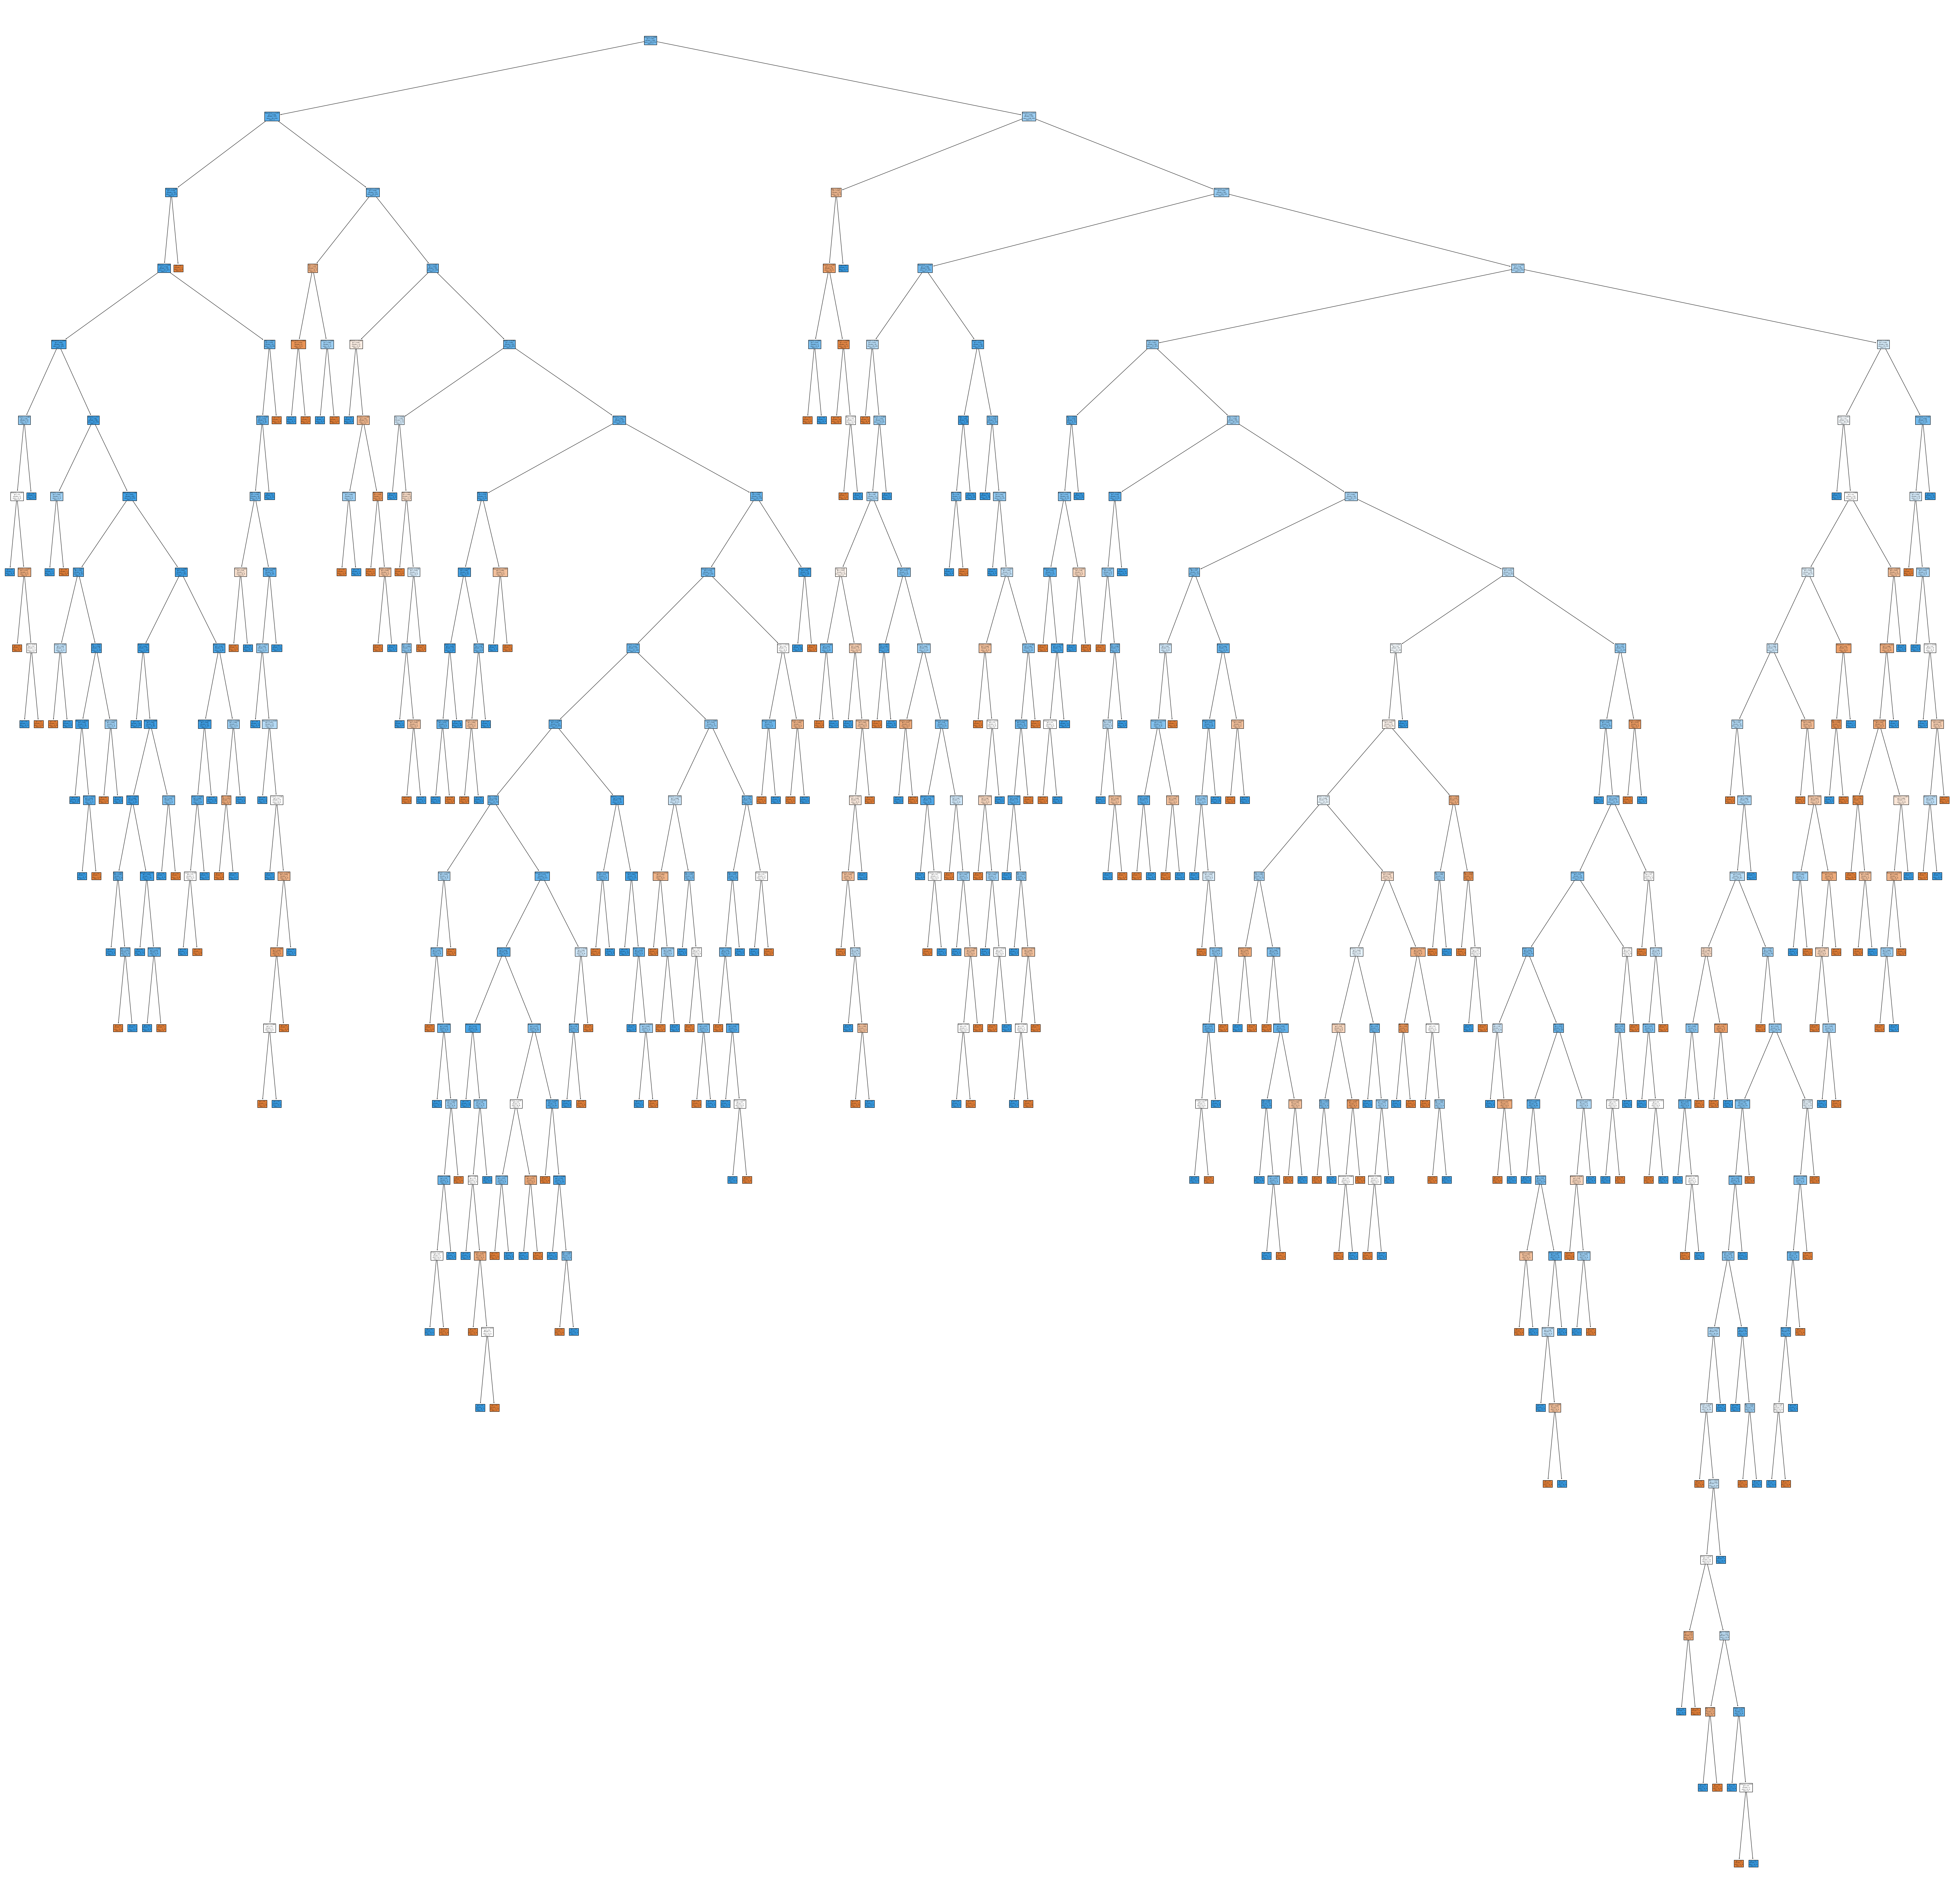

In [93]:
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(Heroin_DT, 
                   feature_names=input_data.columns,  
                   class_names=['0','1'],
                   filled=True)
fig.savefig("Heroin_DT_decistion_tree.png")

# SVC

In [94]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

Heroin_svc = SVC(kernel='linear', C=1)
Heroin_svc.fit(Cannabis_train_data,Y_train)

Heroin_svc_predictions=Heroin_svc.predict(Cannabis_test_data)

Heroin_SVC_accuracy = accuracy_score(Y_test, Heroin_svc_predictions)
Heroin_SVC_precision = precision_score(Y_test, Heroin_svc_predictions)
Heroin_SVC_recall = recall_score(Y_test, Heroin_svc_predictions)


In [95]:
print("Accuracy: ", Heroin_SVC_accuracy,"\nprecision",Heroin_SVC_precision,"\nRecall", Heroin_SVC_recall)

Accuracy:  0.8009630818619583 
precision 0.8009630818619583 
Recall 1.0


# Random Forest

In [96]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
Heroin_RF=RandomForestClassifier(n_estimators=100, 
                            criterion="entropy")


Heroin_RF.fit(Cannabis_train_data,Y_train)
Heroin_RF_predictions=Heroin_RF.predict(Cannabis_test_data)

Heroin_RF_accuracy = accuracy_score(Y_test, Heroin_RF_predictions)
Heroin_RF_precision = precision_score(Y_test, Heroin_RF_predictions)
Heroin_RF_recall = recall_score(Y_test, Heroin_RF_predictions)
#Train the model using the training sets y_pred=clf.predict(X_test)


In [97]:
print("Accuracy: ", Heroin_RF_accuracy,"\nprecision",Heroin_RF_precision,"\nRecall", Heroin_RF_recall)

Accuracy:  0.8009630818619583 
precision 0.831858407079646 
Recall 0.9418837675350702


# 

In [98]:
from sklearn.neighbors import KNeighborsClassifier

Heroin_KNN = KNeighborsClassifier(n_neighbors=10)
Heroin_KNN.fit(Cannabis_train_data,Y_train)
Heroin_KNN_predictions=Heroin_DT.predict(Cannabis_test_data)

Heroin_KNN_accuracy = accuracy_score(Y_test, Heroin_KNN_predictions)
Heroin_KNN_precision = precision_score(Y_test, Heroin_KNN_predictions)
Heroin_KNN_recall = recall_score(Y_test, Heroin_KNN_predictions)

In [99]:
print("Accuracy: ", Heroin_KNN_accuracy,"\nprecision",Heroin_KNN_precision,"\nRecall", Heroin_KNN_recall)

Accuracy:  0.6902086677367576 
precision 0.8311688311688312 
Recall 0.7695390781563126


[[ 46  78]
 [115 384]]
[[  0 124]
 [  0 499]]
[[ 29  95]
 [ 29 470]]
[[ 46  78]
 [115 384]]


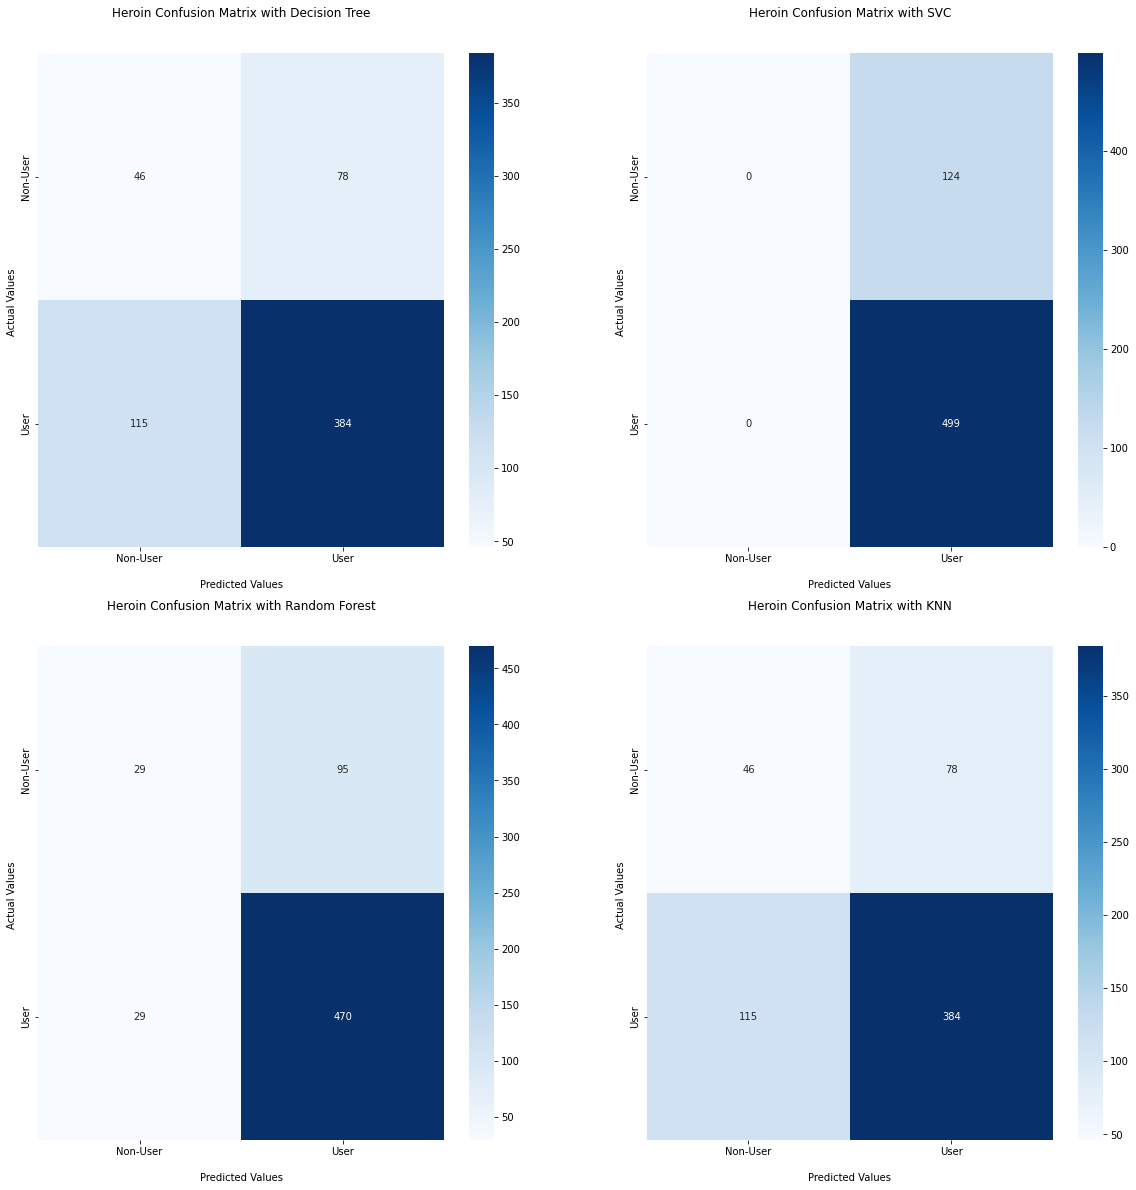

In [100]:
import seaborn as sns
fig = plt.figure(figsize=(20,20))



plt.subplot(2, 2, 1)
cf_matrix_Heroin_DT = confusion_matrix(Y_test, Heroin_DT_predictions)
print(cf_matrix_Heroin_DT)
ax = sns.heatmap(cf_matrix_Heroin_DT, annot=True, cmap='Blues', fmt='g')
ax.set_title('Heroin Confusion Matrix with Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])


plt.subplot(2, 2, 2)
cf_matrix_Heroin_svc = confusion_matrix(Y_test, Heroin_svc_predictions)
print(cf_matrix_Heroin_svc)
ax = sns.heatmap(cf_matrix_Heroin_svc, annot=True, cmap='Blues', fmt='g')
ax.set_title('Heroin Confusion Matrix with SVC\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.subplot(2, 2, 3)
cf_matrix_Heroin_RF = confusion_matrix(Y_test, Heroin_RF_predictions)
print(cf_matrix_Heroin_RF)
ax = sns.heatmap(cf_matrix_Heroin_RF, annot=True, cmap='Blues', fmt='g')
ax.set_title('Heroin Confusion Matrix with Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.subplot(2, 2, 4)
cf_matrix_Heroin_KNN = confusion_matrix(Y_test, Heroin_KNN_predictions)
print(cf_matrix_Heroin_KNN)
ax = sns.heatmap(cf_matrix_Heroin_KNN, annot=True, cmap='Blues', fmt='g')
ax.set_title('Heroin Confusion Matrix with KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-User','User'])
ax.yaxis.set_ticklabels(['Non-User','User'])

plt.show()

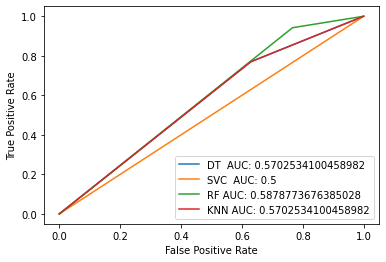

In [102]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = metrics.roc_curve(Y_test,  Heroin_DT_predictions)
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  Heroin_svc_predictions)
fpr2, tpr2, _ = metrics.roc_curve(Y_test,  Heroin_RF_predictions)
fpr3, tpr3, _ = metrics.roc_curve(Y_test,  Heroin_KNN_predictions)
#create ROC curve
plt.plot(fpr,tpr, label="DT  AUC: "+str(roc_auc_score(Y_test,  Heroin_DT_predictions)))
plt.plot(fpr1,tpr1, label="SVC  AUC: "+str(roc_auc_score(Y_test,  Heroin_svc_predictions)))
plt.plot(fpr2,tpr2, label="RF AUC: "+str(roc_auc_score(Y_test,  Heroin_RF_predictions)))
plt.plot(fpr3,tpr3, label="KNN AUC: "+str(roc_auc_score(Y_test,  Heroin_KNN_predictions)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()